In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import seed 
seed(42)
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve

from sklearn.neighbors import KNeighborsRegressor

import scikitplot as skplt

ModuleNotFoundError: ignored

In [ ]:
#Importing only the first 30000 rows
df = pd.read_csv("/Asteroid_Updated.csv",nrows = 30000)

In [ ]:
df.head()

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822,...,0.426,NaN,C,G,0.12,1.59478,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318,...,0.284,NaN,B,B,0.11,1.23324,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684,...,0.433,NaN,Sk,S,0.32,1.03454,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288,...,0.492,NaN,V,V,0.32,1.13948,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507,...,0.411,NaN,S,S,NaN,1.09589,MBA,0.238632,1508.600458,282.366289


In [ ]:
df.isna().sum()

name               9624
a                     0
e                     0
i                     0
om                    0
w                     0
q                     0
ad                    0
per_y                 0
data_arc              0
condition_code        0
n_obs_used            0
H                     0
neo                   1
pha                   1
diameter           5534
extent            24488
albedo             5551
rot_per           16858
GM                24491
BV                23484
UB                23526
IR                24502
spec_B            23051
spec_T            23526
G                 24387
moid                  1
class                 1
n                     1
per                   1
ma                    1
dtype: int64

In [ ]:
for column in df.columns:
    print(column, df[column].isna().sum()/df.shape[0]) #returns the fraction of NAN values

name 0.3927842625091829
a 0.0
e 0.0
i 0.0
om 0.0
w 0.0
q 0.0
ad 0.0
per_y 0.0
data_arc 0.0
condition_code 0.0
n_obs_used 0.0
H 0.0
neo 4.0812994857562645e-05
pha 4.0812994857562645e-05
diameter 0.2258591135417517
extent 0.9994286180719941
albedo 0.22655293445433025
rot_per 0.6880254673087911
GM 0.9995510570565668
BV 0.9584523712350013
UB 0.9601665170190189
IR 1.0
spec_B 0.9407803444616766
spec_T 0.9601665170190189
G 0.9953065055913803
moid 4.0812994857562645e-05
class 4.0812994857562645e-05
n 4.0812994857562645e-05
per 4.0812994857562645e-05
ma 4.0812994857562645e-05


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24502 entries, 0 to 24501
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            14878 non-null  object 
 1   a               24502 non-null  float64
 2   e               24502 non-null  float64
 3   i               24502 non-null  float64
 4   om              24502 non-null  float64
 5   w               24502 non-null  float64
 6   q               24502 non-null  float64
 7   ad              24502 non-null  float64
 8   per_y           24502 non-null  float64
 9   data_arc        24502 non-null  int64  
 10  condition_code  24502 non-null  int64  
 11  n_obs_used      24502 non-null  int64  
 12  H               24502 non-null  float64
 13  neo             24501 non-null  object 
 14  pha             24501 non-null  object 
 15  diameter        18968 non-null  object 
 16  extent          14 non-null     object 
 17  albedo          18951 non-null 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8c40716350>,
      dtype=object)

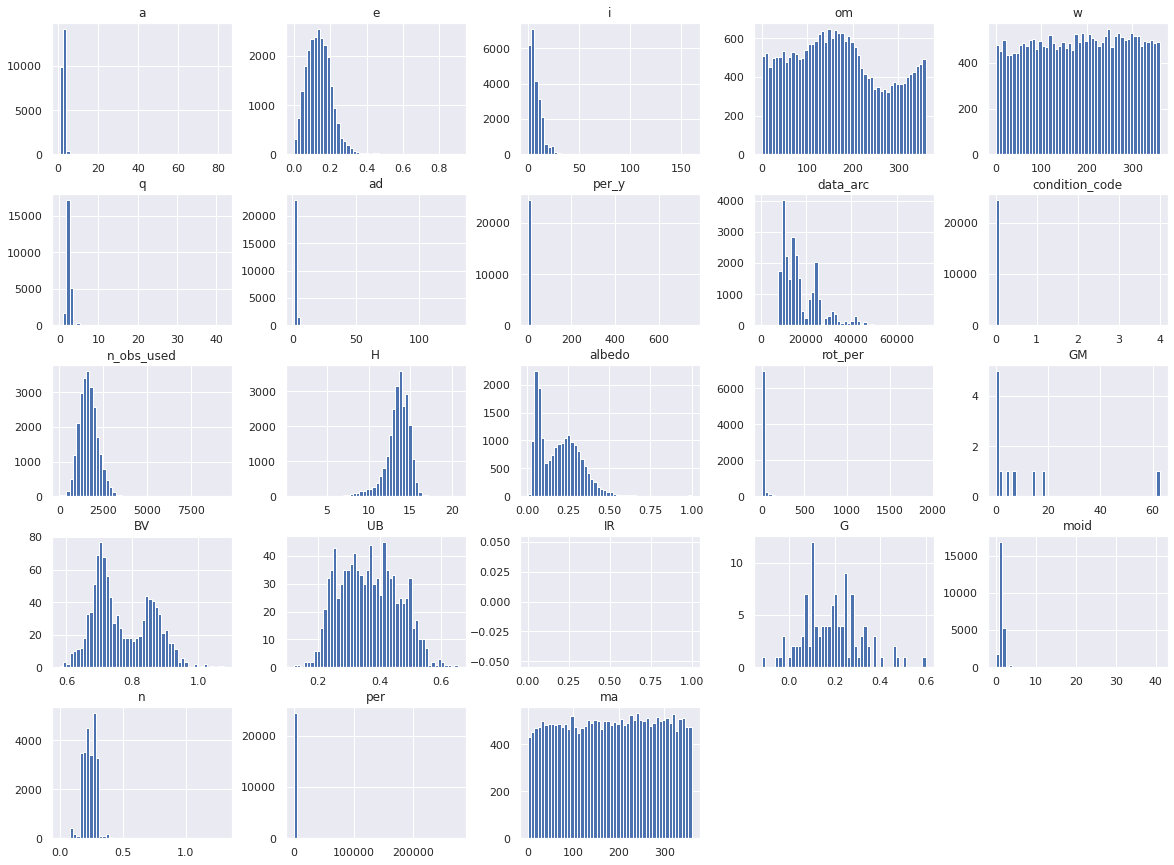

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8c3d610a90>,
      dtype=object)

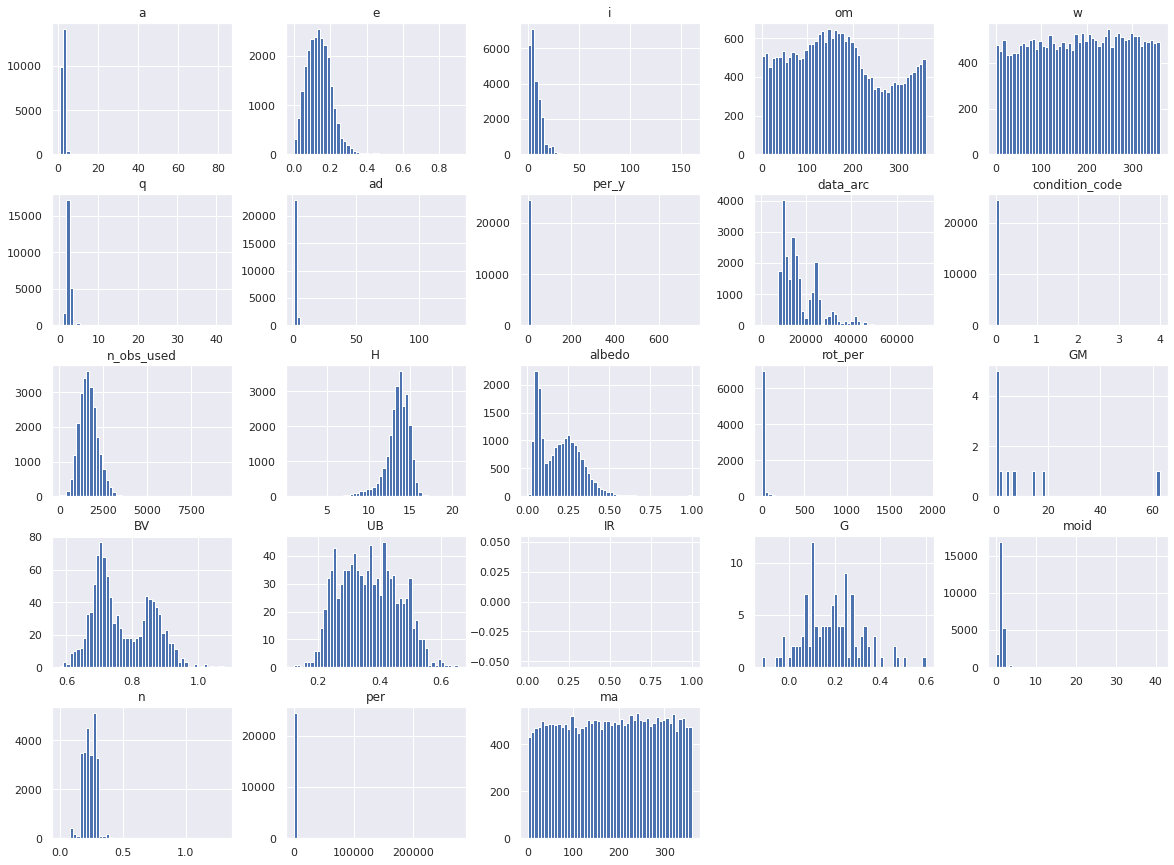

In [ ]:
df.hist(bins = 50, figsize = (20,15))

In [ ]:
## Convert diameter To float
convertDict = {'diameter' : float}
df = df.astype(convertDict) 
## correlation
corr_matrix = df.corr()
corr_matrix.columns
corr_matrix['diameter'].sort_values(ascending = False)

diameter          1.000000
GM                0.904910
data_arc          0.520613
a                 0.432273
moid              0.413639
ad                0.412882
q                 0.409263
per_y             0.402195
per               0.402195
n_obs_used        0.400760
condition_code    0.240750
i                 0.173231
ma                0.017861
w                 0.004054
om                0.002455
rot_per          -0.011310
e                -0.026986
G                -0.102799
UB               -0.179859
albedo           -0.291900
n                -0.299047
BV               -0.305864
H                -0.729021
IR                     NaN
Name: diameter, dtype: float64

In [ ]:
dropindexes = df['diameter'][df['diameter'].isnull()].index #rows with nan diameters to drop
dropped_df = df.loc[dropindexes] #saving dropped rows for the future
df = df.drop(dropindexes, axis=0) 

In [ ]:
print(df['neo'])

0        N
1        N
2        N
3        N
4        N
        ..
19070    N
19071    N
19073    N
19074    N
19077    N
Name: neo, Length: 15420, dtype: object


In [ ]:
tooMuchNa = df.columns[df.isna().sum()/df.shape[0] > 0.5]
df = df.drop(tooMuchNa,axis=1)
df = df.drop(['condition_code','name'],axis=1)


In [ ]:
df.isna().sum()

a              0
e              0
i              0
om             0
w              0
q              0
ad             0
per_y          0
data_arc       0
n_obs_used     0
H              0
neo            0
pha            0
diameter       0
albedo        17
moid           0
class          0
n              0
per            0
ma             0
dtype: int64

In [ ]:
labelEnc = LabelEncoder()
df['neo'] = labelEnc.fit_transform(df['neo'])
df['pha'] = labelEnc.fit_transform(df['pha'])
df['class'] = labelEnc.fit_transform(df['class'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


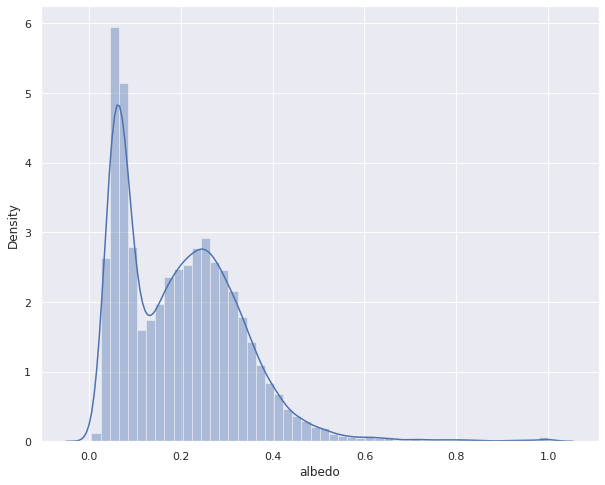

In [ ]:
fig, ax= plt.subplots(figsize = (10,8))
sns.distplot(df.albedo)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


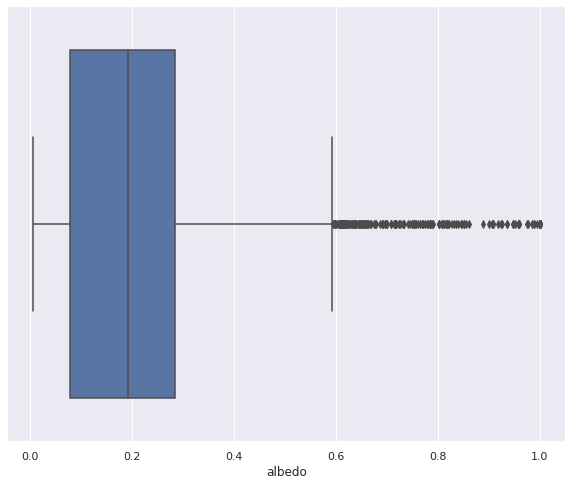

In [ ]:
fig, ax= plt.subplots(figsize = (10,8))
sns.boxplot(df.albedo)

In [ ]:
df = df.fillna(df.median()) #because the data is skewed

In [ ]:
df.head()

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,H,neo,pha,diameter,albedo,moid,class,n,per,ma
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822,1002,3.34,0,0,939.400,0.0900,1.59478,6,0.213885,1683.145708,77.372096
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318,8490,4.13,0,0,545.000,0.1010,1.23324,6,0.213503,1686.155999,59.699133
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684,7104,5.33,0,0,246.596,0.2140,1.03454,6,0.226019,1592.787285,34.925016
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288,9325,3.20,0,0,525.400,0.4228,1.13948,6,0.271609,1325.432765,95.861936
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507,2916,6.85,0,0,106.699,0.2740,1.09589,6,0.238632,1508.600458,282.366289


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18968 entries, 0 to 24500
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   a           18968 non-null  float64
 1   e           18968 non-null  float64
 2   i           18968 non-null  float64
 3   om          18968 non-null  float64
 4   w           18968 non-null  float64
 5   q           18968 non-null  float64
 6   ad          18968 non-null  float64
 7   per_y       18968 non-null  float64
 8   data_arc    18968 non-null  int64  
 9   n_obs_used  18968 non-null  int64  
 10  H           18968 non-null  float64
 11  neo         18968 non-null  int64  
 12  pha         18968 non-null  int64  
 13  diameter    18968 non-null  float64
 14  albedo      18968 non-null  float64
 15  moid        18968 non-null  float64
 16  class       18968 non-null  int64  
 17  n           18968 non-null  float64
 18  per         18968 non-null  float64
 19  ma          18968 non-nul

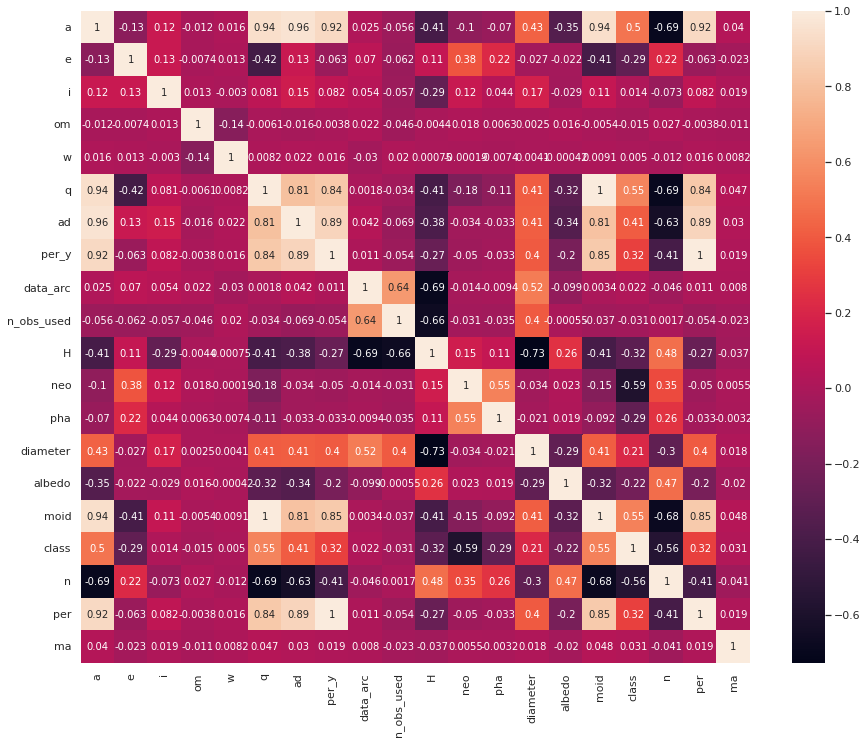

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
plt.subplots(figsize=(15,12))
num_data = df.select_dtypes(include=numerics)
sns.heatmap(num_data.corr(),annot=True,annot_kws={'size':10})

In [ ]:
from sklearn.model_selection import train_test_split
predictors = df.drop('diameter',axis=1) 
target = df['diameter']
X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [ ]:
from sklearn import preprocessing

#Input standard normalization:
std_scaler = preprocessing.StandardScaler().fit(X_train)

def scaler(X):
    x_norm_arr= std_scaler.fit_transform(X)
    return pd.DataFrame(x_norm_arr, columns=X.columns, index = X.index)

X_train_norm = scaler(X_train)
forest.fit(X_train_norm, Y_train)

def scaler1(X):
    x_norm_arr= std_scaler.transform(X)
    return pd.DataFrame(x_norm_arr, columns=X.columns, index = X.index)

X_test_norm = scaler1(X_test)
forest.fit(X_test_norm, Y_test)

def inverse_scaler(X):
    x_norm_arr= std_scaler.inverse_transform(X)
    return pd.DataFrame(x_norm_arr, columns=X.columns, index = X.index)

In [ ]:
from sklearn.metrics import r2_score
import seaborn as sns

def plot(prediction):
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,7)) 
    sns.distplot(Y_test.values,label='test values', ax=ax1)
    sns.distplot(prediction ,label='prediction', ax=ax1)
    ax1.set_xlabel('Distribution plot')
    ax2.scatter(Y_test,prediction, c='orange',label='predictions')
    ax2.plot(Y_test,Y_test,c='blue',label='y=x')
    ax2.set_xlabel('test value')
    ax2.set_ylabel('estimated diameter')
    ax1.legend()
    ax2.legend()
    ax2.axis('scaled') #same x y scale 
def score(prediction):
    score = r2_score(prediction,Y_test)
    return score
def announce(score):
    print('The R^2 score achieved using this regression is:', round(score,3))
algorithms = []
scores = []

Random Forest Regressor

In [ ]:
### Defining the model
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(max_depth=32, n_estimators=50)

### Training 
forest.fit(X_train_norm,np.ravel(Y_train))

###Predicting
Y_pred_forest = forest.predict(X_test_norm)

### Scoring
score_forest = score(Y_pred_forest)
announce(score_forest)

algorithms.append('RForest')
scores.append(score_forest)

The R^2 score achieved using this regression is: 0.983


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


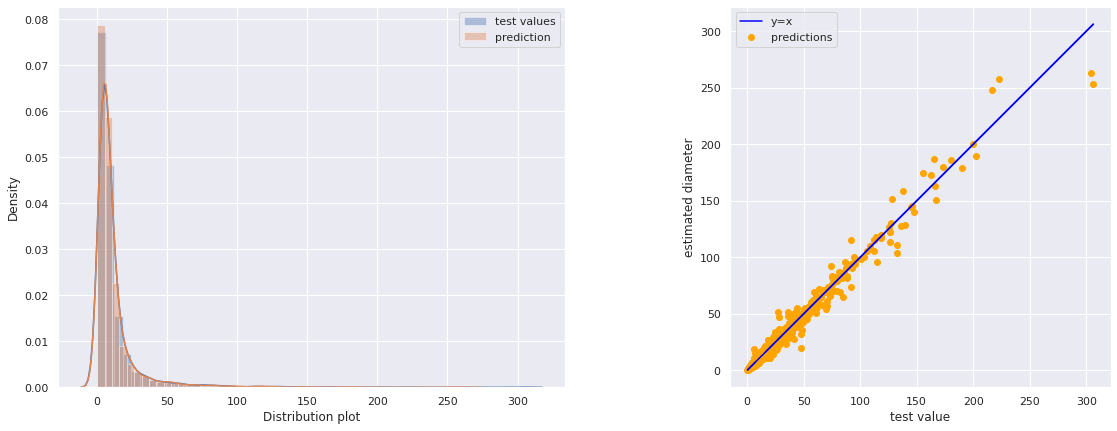

In [ ]:
plot(Y_pred_forest)